In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geostat as geo
import pandas as pd

ModuleNotFoundError: No module named 'geostat'

In [2]:
mydata = np.genfromtxt('../data/massilon-face2-universal_cord.csv', delimiter=',')
#mydata = np.genfromtxt('../data/massilon-face6-universal_cord.txt',  delimiter=' ', skip_header=4)

mydata = np.array( mydata )
print(mydata)
x = mydata[1:,0:1]
v = mydata[1:,5]
n = len(v)

xx,yy,vv = np.copy(x[:,0]), np.copy(x[:,1]), np.copy(v)

xx.shape = (50,50)
yy.shape = (50,50)
vv.shape = (50,50)

[[     nan      nan      nan ...,      nan      nan      nan]
 [ 20.32     0.      84.46   ..., -26.7309 -26.4616 -26.5061]
 [ 21.59     0.      84.46   ..., -26.7147 -26.5093 -26.5425]
 ..., 
 [ 80.01     0.      22.23   ..., -26.8609 -26.2348 -26.1006]
 [ 81.28     0.      22.23   ..., -26.384  -26.2274 -26.0645]
 [ 82.55     0.      22.23   ..., -26.4432 -26.0196 -26.052 ]]


IndexError: index 1 is out of bounds for axis 1 with size 1

In [95]:
d = pd.read_excel('../data/massilon-face6-universal_cord.xlsx')
#d.head()
x = np.array( [d.X,d.Y]).transpose()
v = d.k3
n = len(v)

xx,yy,vv = np.copy(d.X), np.copy(d.Y), np.copy(v)

xx.shape = (50,50)
yy.shape = (50,50)
vv.shape = (50,50)

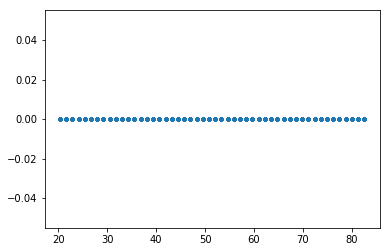

In [102]:
plt.plot(x[:,0],x[:,1],'.')
plt.show()

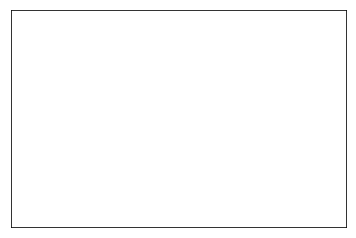

In [93]:
fig = plt.pcolormesh(xx,yy,vv)

#fig.axes.get_xaxis().set_visible(False)
#fig.axes.get_yaxis().set_visible(False)

#plt.savefig('tmp.png',pad_inches='tight')
plt.show()

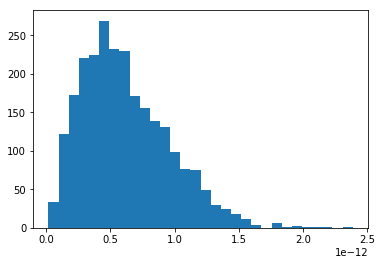

In [41]:
plt.hist(v,30)
plt.show()

In [32]:

vario = geo.ExperimentalVariogram(x, v)

C:\Users\gehrenard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\gehrenard\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


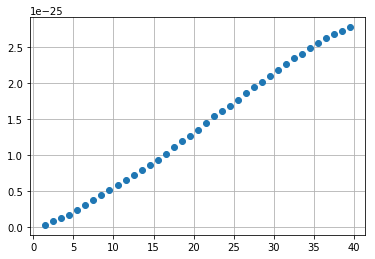

In [33]:
he,ve = vario(hmax=40,lag=1)

plt.plot(he,ve,'o')
plt.grid()
plt.show()

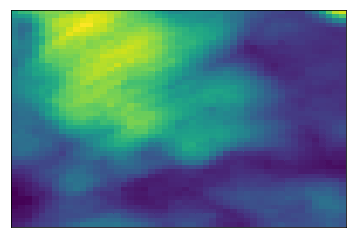

In [ ]:
i = np.random.randint(0,2500,100)
plt.scatter(d.X[i],d.Y[i],20,c=v[i])
plt.show()

In [ ]:
X = np.array([d.X[i],d.Y[i]]).transpose()
expvario = geo.ExperimentalVariogram(X, v[i])
print(X.shape)
he,ge = expvario(hmax=60.0,lag=2)

# Defines a variogram model: adapt the range, sill and type
#variomod = geo.variogram( 0.5, 8600, typ='linear' , nugget=0.1)
#variomod = geo.variogram( 0.4, 900, typ='spherical' , nugget=0.1)

variomod1 = geo.Variogram( 10, 0.15, typ='exponential' , nugget=0)
variomod2 = geo.Variogram( 40, 0.10, typ='gaussian' , nugget=0)

# Superposes the plot of the two curves for manual fitting
hplot = np.arange(0,60,0.01)

plt.figure(figsize=(7,5))
plt.plot(he,ge,'o',label='data')
plt.plot(hplot,variomod1(hplot)+variomod2(hplot),label='model')
plt.grid()
plt.legend()
plt.title('Variogram')
plt.xlabel('h')
plt.show()

C:\Users\gehrenard\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'n' is not defined

In [ ]:
print(np.sqrt(2500))


plt.subplot(221)
plt.hist(v, density=True, cumulative=False, histtype='bar')
plt.xlabel('Z')
plt.title('Histogram')

plt.subplot(222)
v.shape=(n,)
s = v-np.min(v)
plt.scatter(x[:,0], x[:,1], s=s*10, c=v, alpha=0.5)
plt.title('Map of measured Z(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()